In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2 as cv
import re
import requests
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
import PIL
from PIL import Image
import imageio
import os
import warnings


from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [2]:
x_train = []
y_train = []

image_shape = (96, 96, 3)

path_to_subset = 'train/'

for folder in os.listdir(path_to_subset):
        
    for image in os.listdir(os.path.join(path_to_subset, folder)):
        path_to_image = os.path.join(path_to_subset, folder, image)
        image = cv.imread(path_to_image)
        image = cv.resize(image, (image_shape[1], image_shape[0]))
        label = folder
            
        x_train.append(image)
        y_train.append(label)
        
for i in range(len(y_train)):
    if y_train[i]=='BANDED BROADBILL':
        y_train[i]=0
    else:
        y_train[i]=1

In [3]:
x_test = []
y_test = []

image_shape = (96, 96, 3)

path_to_subset = 'test/'

for folder in os.listdir(path_to_subset):
        
    for image in os.listdir(os.path.join(path_to_subset, folder)):
        path_to_image = os.path.join(path_to_subset, folder, image)
        image = cv.imread(path_to_image)
        image = cv.resize(image, (image_shape[1], image_shape[0]))
        label = folder
            
        x_test.append(image)
        y_test.append(label)

for i in range(len(y_test)):
    if y_test[i]=='BANDED BROADBILL':
        y_test[i]=0
    else:
        y_test[i]=1

In [4]:
y_test

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [5]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [6]:
train_set_x_orig = np.array(x_train)
train_set_y_orig = np.array(y_train)

test_set_x_orig = np.array(x_test)
test_set_y_orig = np.array(y_test)

classes = np.array(['BANDED BROADBILL', 'BIRD OF PARADISE'])

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.0052, print_cost = False)

train accuracy: 100.0 %
test accuracy: 90.0 %


In [61]:
pic ='valid/BANDED BROADBILL/2.jpg'

image_shape = (96, 96, 3)
image = cv.imread(pic)
image = cv.resize(image, (image_shape[1], image_shape[0]))      
image=image/255.
        
my_image = Image.fromarray((image*255).astype(np.uint8)).resize(size=(num_px, num_px))
my_image =np.reshape(my_image,(1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)
if(float(str(np.squeeze(my_predicted_image)))==0):
   print(pic,"it is a banded broadbill")
else:
   print(pic,"it is a bird of paradise")

valid/BANDED BROADBILL/2.jpg it is a banded broadbill


<ipython-input-5-bfeadb1f34cb>:2: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


In [62]:
pic ='valid/BIRD OF PARADISE/1.jpg'

image_shape = (96, 96, 3)
image = cv.imread(pic)
image = cv.resize(image, (image_shape[1], image_shape[0]))
image=image/255.
        
my_image = Image.fromarray((image*255).astype(np.uint8)).resize(size=(num_px, num_px))
my_image =np.reshape(my_image,(1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)
if(float(str(np.squeeze(my_predicted_image)))==0):
   print(pic,"it is a banded broadbill")
else:
   print(pic,"it is a bird of paradise")

valid/BIRD OF PARADISE/1.jpg it is a bird of paradise


In [9]:
l=[]
for i in y_train:
    e=[0,0]
    e[i]=1
    l.append(e)
l

[[1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 

In [10]:
x = np.array(x_train) / 255.0
test = np.array(x_test) / 255.0
y = np.array(l)

In [11]:
print(x.shape,y.shape,test.shape)

(322, 96, 96, 3) (322, 2) (10, 96, 96, 3)


In [12]:
datagen = ImageDataGenerator(rotation_range = 45,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            validation_split = 0.2)

In [13]:
from keras.callbacks import History 
history = History()

In [14]:
model = Sequential()

model.add(Conv2D(32, 3, padding = 'same', input_shape = image_shape, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(3))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(datagen.flow(x, y, batch_size = 30),epochs = 10, verbose = 1,callbacks=[history])

Epoch 1/10
11/11 [==============================] - 9s 584ms/step - loss: 0.9209 - accuracy: 0.6833
Epoch 2/10
11/11 [==============================] - 5s 483ms/step - loss: 0.6532 - accuracy: 0.8014
Epoch 3/10
11/11 [==============================] - 6s 501ms/step - loss: 0.4289 - accuracy: 0.8333
Epoch 4/10
11/11 [==============================] - 5s 486ms/step - loss: 0.2846 - accuracy: 0.9030
Epoch 5/10
11/11 [==============================] - 5s 483ms/step - loss: 0.2768 - accuracy: 0.9191
Epoch 6/10
11/11 [==============================] - 7s 592ms/step - loss: 0.1984 - accuracy: 0.9232
Epoch 7/10
11/11 [==============================] - 6s 566ms/step - loss: 0.1509 - accuracy: 0.9447
Epoch 8/10
11/11 [==============================] - 6s 519ms/step - loss: 0.2308 - accuracy: 0.9226
Epoch 9/10
11/11 [==============================] - 6s 519ms/step - loss: 0.1177 - accuracy: 0.9635
Epoch 10/10
11/11 [==============================] - 6s 523ms/step - loss: 0.1537 - accuracy: 0.9400

In [23]:
tt=test[0].reshape((1,image.shape[0],image.shape[1],image.shape[2]))

In [25]:
model.predict(test)

array([[0.40272242, 0.45223683],
       [0.04258648, 0.8123217 ],
       [0.20405981, 0.6815914 ],
       [0.15432414, 0.8998755 ],
       [0.19747657, 0.41575053],
       [0.09359783, 0.9450023 ],
       [0.01266959, 0.9879989 ],
       [0.79502606, 0.18715623],
       [0.04206863, 0.4530762 ],
       [0.0252921 , 0.92749053]], dtype=float32)

In [16]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
xc = range(1,11)

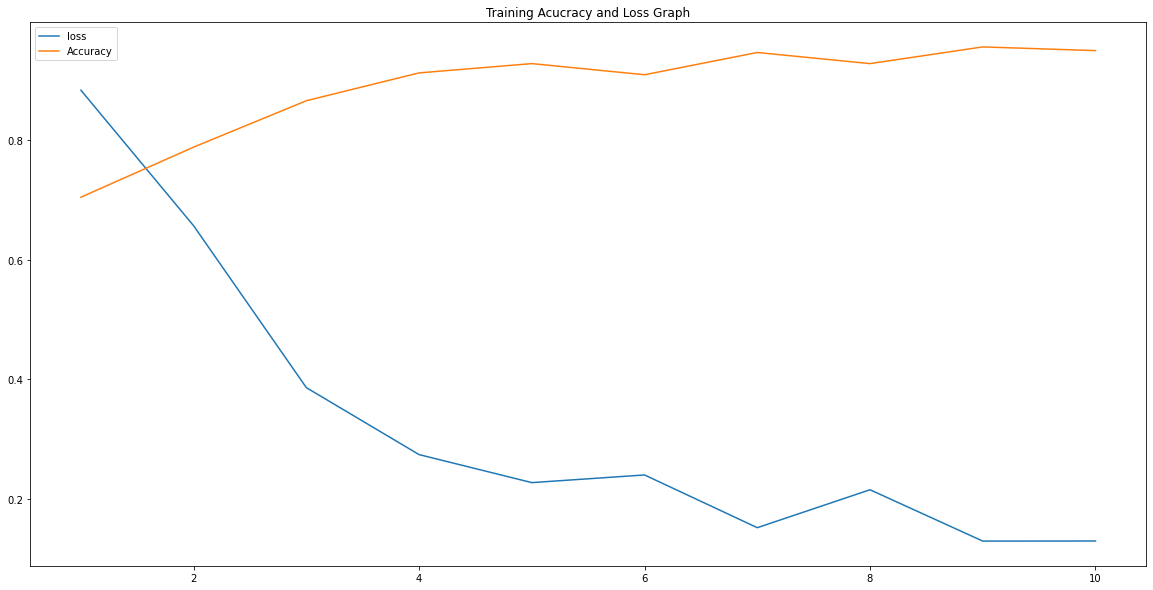

In [17]:
plt.figure(figsize = (20,10))
plt.title("Training Accuracy and Loss Graph")
plt.plot(xc, train_loss,label='loss')
plt.plot(xc, train_accuracy,label='Accuracy')
plt.legend()

In [67]:
pic ='valid/BANDED BROADBILL/1.jpg'

image_shape = (96, 96, 3)
image = cv.imread(pic)
image = cv.resize(image, (image_shape[1], image_shape[0])) 

img=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
img=img/255.
pred=model.predict(img)
print(pred)
if(pred[0][0]>pred[0][1]):
   print(pic,"it is a banded broadbill")
else:
   print(pic,"it is a bird of paradise")

[[0.9765084  0.01625174]]
valid/BANDED BROADBILL/1.jpg it is a banded broadbill


In [69]:
pic ='valid/BIRD OF PARADISE/1.jpg'

image_shape = (96, 96, 3)
image = cv.imread(pic)
image = cv.resize(image, (image_shape[1], image_shape[0]))  

img=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
img=img/255.
pred=model.predict(img)
print(pred)
if(pred[0][0]>pred[0][1]):
   print(pic,"it is a banded broadbill")
else:
   print(pic,"it is a bird of paradise")

[[0.01066068 0.96553034]]
valid/BIRD OF PARADISE/1.jpg it is a bird of paradise
